# Prepare yourself

To sum up the last couple nodes, here are all the single-qubit gates and thier matrix representations, circuit elements, and their actions on the basis states.


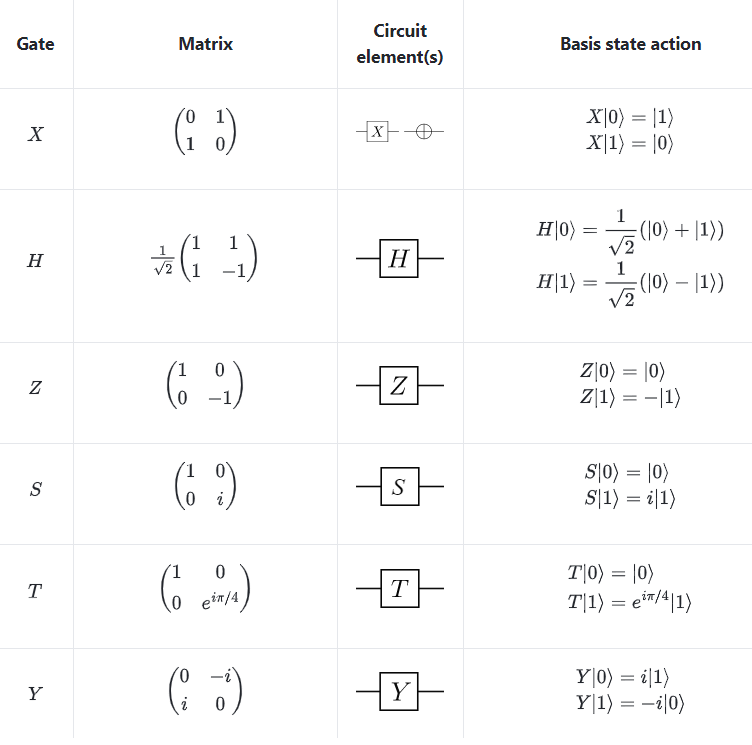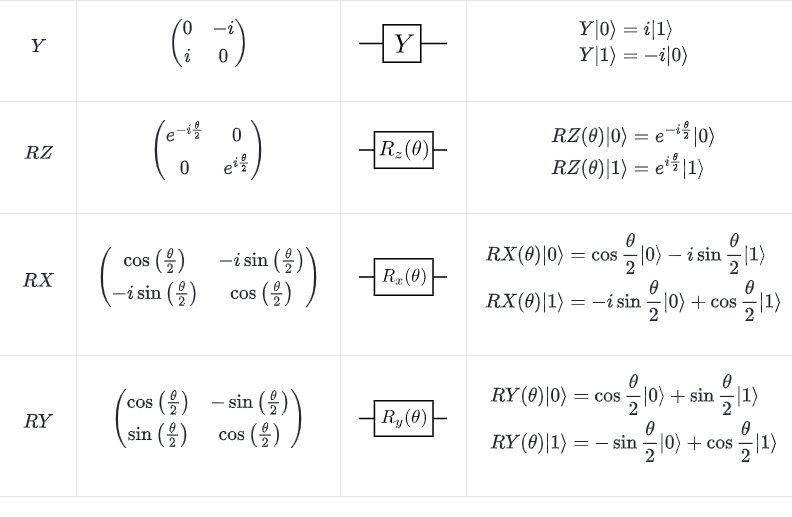

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

Now, that we have the tools to perform arbitrary **quantum state preparation** of a single qubit! State preparation takkes place at the start of many algorithms. There is some target we would like the qubit to be in, and we need to figure out the sequence of operations that , acting on $|0\rangle$ produces the desired state.

### Codercise I.8.1 

Write a circuit that prepares the quantum state 

$$|Ψ⟩ = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}} e^{5\iota \pi/4 } |1⟩$$



In [1]:
%pip install pennylane
import pennylane as qml
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.7 MB/s eta 0:00:00


In [2]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)


    # APPLY OPERATIONS TO PREPARE THE TARGET STATE

    return qml.state()


### Codercise I.8.2 
Write a circuit that prepares the quantum state:

$$ |\psi⟩ =\frac{\sqrt{3}}{2} |0⟩ - \frac{\iota}{2}|1⟩ $$

up to a global phase using a few gates as possible

In [3]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi/3, wires=0)

    return qml.state()


There are automated tools to perform such state preparation. Pennylabe contains a library of **templates**, some of which perform state preparation.

They are subroutines which can be used just like any other gate:


```python
def my_circuit():
  qml.MyTemplate(parameters,wires)
```

----
PennyLane contains a template called `MottonenStatePreparation` which will automatically prepare any normalized qubit state vector, up to a global phase. You only pass the template a normalized state vector , and a set of wires

### Codercise I.8.3

Write a QNode that uses `qml.MottonenStatePreparation` to prepare the state

$$ |v⟩ = (0.52889389 - 0.14956775\iota)|0⟩ + (0.67262317 + 0.49545818\iota) |1⟩$$

Return the state of system

In [4]:
v = np.array([0.52889389-0.14956775j, 0.67262317+0.49545818j])

##################
# YOUR CODE HERE #
##################
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
# CREATE A DEVICE


# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE

def prepare_state(state=v):
    
    qml.MottonenStatePreparation(v,wires=0)
    
    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy='device')(v))


[0.49365933-0.24166034j 0.75032489+0.36730546j]

0: ──RY(1.98)──RZ(0.91)─┤  State
